In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import operator

from wordcloud import WordCloud
from collections import Counter

In [10]:
from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

### "금리"라는 단어가 포함된 뉴스 기사

In [18]:
interest_df = pd.read_csv('interest_keyword_v0.2.csv')
interest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       728 non-null    int64 
 1   title     728 non-null    object
 2   new_text  728 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.2+ KB


In [19]:
# interest_df.head()

In [22]:
interest_df['new_text']

0       유인식 IBK기업은행 전략기획부 ESG경영부장녹색금융 이야기 아닌 행동할 때......
1        대구지방법원은 은행 직원을 사칭해 저금리에 대환대출을 해주겠다고 속이고 돈을 가...
2        아르헨티나 중앙은행(BCRA)은 14일(현지시간) 기준금리를 97.00%에서 1...
3       제일·수협·부산은행서 출시예금잔액, 한달새 12조 불어저축은행도 줄줄이 금리인상조...
4       카드론 금리 영향 주는 여전채…2달간 4% 중반 유지건전성 리스크 수면 위로…업계...
                             ...                        
723     뉴욕증시는 미국 국채금리의 상승세로 조정 압력이 커지며 하락했습니다. 현지 시각 ...
724     주택 수급 감소 우려  미국 메사추세츠 주 서드버리에 건축중인 주택 [AP] [헤...
725     친환경 소비, 기부·봉사·헌혈 동참 장려  ] 은행이 ESG(환경·사회·지배구조)...
726     비트코인, 2만6000달러까지 떨어져리플 등 주요 알트코인도 10% 안팎 하락미 ...
727     중국 경제 불안이 전방위로 확산하고 있다. 부동산발(發) 위기가 금융으로 전이돼 ...
Name: new_text, Length: 728, dtype: object

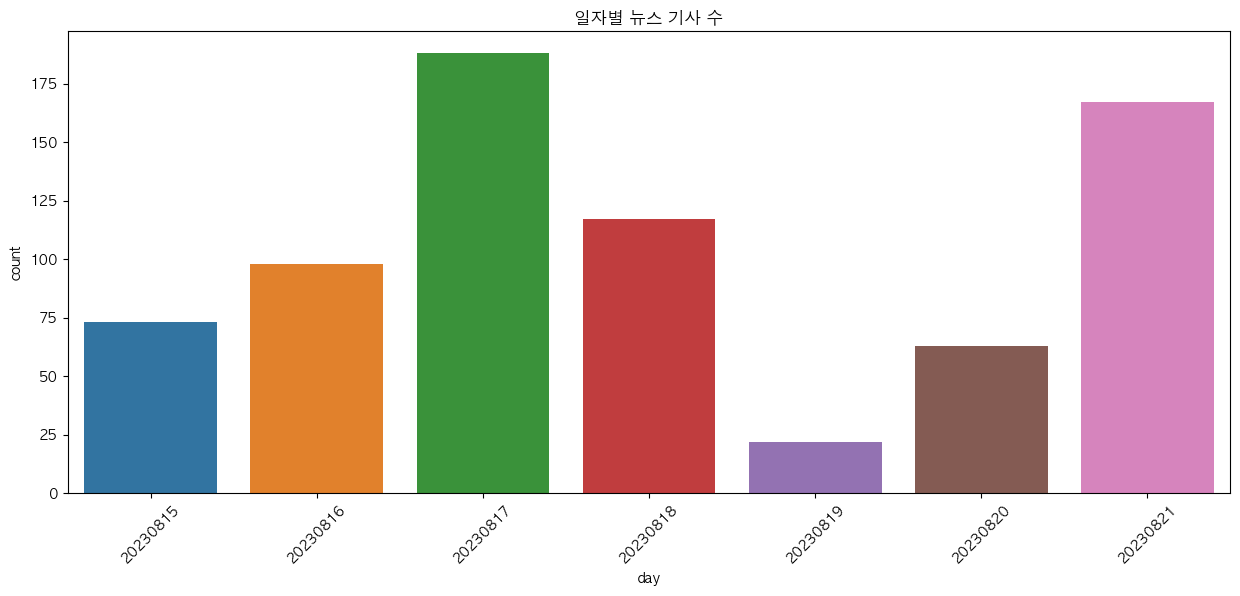

In [20]:
# 일자별 뉴스 기사 수
plt.figure(figsize=(15, 6))
sns.countplot(x='day', data=interest_df)
plt.title('일자별 뉴스 기사 수')
plt.xticks(rotation=45)
plt.show()

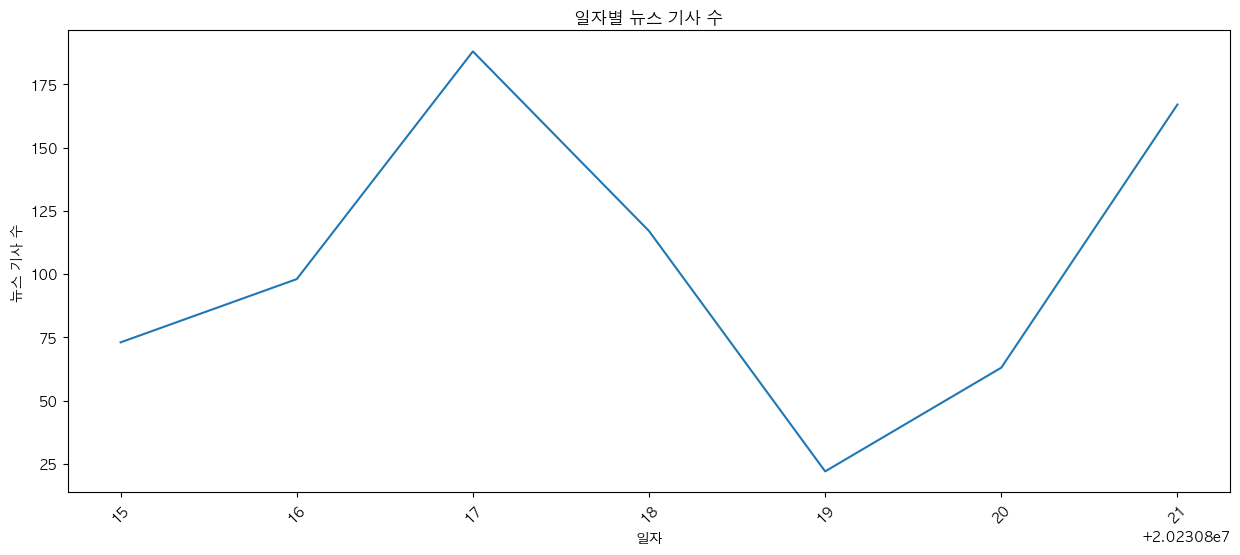

In [21]:
# 'day' 컬럼을 기준으로 뉴스 기사 수를 계산하여 새로운 데이터프레임 생성
news_counts = interest_df['day'].value_counts().reset_index()
news_counts.columns = ['day', 'count']

# 일자별 뉴스 기사 수 꺾은 선 그래프
plt.figure(figsize=(15, 6))
sns.lineplot(x='day', y='count', data=news_counts)
plt.title('일자별 뉴스 기사 수')
plt.xticks(rotation=45)
plt.xlabel('일자')
plt.ylabel('뉴스 기사 수')
plt.show()

In [33]:
stop_words = ['특판', '타임톡', '비중은', '공감언론', '과정에서', '않도록', '규모를', '경찰에', '25', '우수', '이사', '개선', '과도하게', '제출받은', '새', '증가세가', '경제적', '돼', 'nh농협은행이', '19세', '비해',
                  '14일', '출시했다', '발표한', '취급한', '관리를', '1분기', '통신사', '것도', '정책을', '않는', '발표했다', '은행에', '있지', '앱', '금융감독원은', '자체', '최초로', '정책위의장은', '없는지', '45', '원인으로', 
                  '한도가', '지', '2023년', '작년', '결과', '중인', '금리로', '실제', '심사', '오후', '하나로', '당시', '더욱', '문제가', '그러면서', '금융감독원', '관리가', '수출', '출시', '박', '체결한', '연간', '5일',
                  '연령대', '오은영', '연체율은', '정부의', '우회하는', '은행들이', '전년', '모습', '주담대는', '주택담보대출이', '주는', '수밖에', '정부는', '전날', '가입', '첫', '있지만', '방안을', '코픽스', '기업',
                  '3분기', '하반기', '일반', '이같이', '인터넷은행의', '제보는', '이들은', '계속', '당국이', '금리도', '대학', '4명', '혐의로', '4월', '있는데', '우려가', '보면', '받고', '전했다', '있기', '이자는', '보는', 
                  '취급', '대출에', 'nh농협은행은', '17', '연방', '엄영수가', '채널', '70', '있도록', '검토하고', '담보로', '두고', '주택담보대출을', '수준이다', '지적장애인', '국유재산과', '정책에', '13', '가계부채가', '횡령',
                  '강화를', '방송', '이용', '은행이', '원인',  'kb국민', '대상', '정부', '12월', '상품으로', '기존', '다양한', '사기', '가능하다', '지적이', '카카오뱅크의', '없는', '규모의', '당초', '오늘', '매수', '제한을',
                  '20', '지적했다', '지원을', '국민', 'kbs', '이하', '40', '3월', '직접', '자금을', '은행들은', '농협은행은', '점검을', '가로챈', '경우가', '수단으로', '상황에서', '보이고', '만기가', '2분기', '카카오뱅크',
                  '두', '또는', '이는', '시장', '포함', '역할을', '자료에', '우회', '은행권의', '기록했다', '고객을', '했습니다', '가능성이', '시스템', '라고', '강조했다', '밝혔습니다', '갚는', '김희곤', '앞두고', '최고',
                  '관련해', '11월', '일부', '있을', '제도', '8월', '대출은', '없이', '간담회', '대해서는', '이벤트', '모든', '한편', '케이뱅크는', '카카오톡', '원장은', '15일', '많은', '대출의', '계획이다', '카톡', '20일',
                  '국민을', '오는', '만', '한도를', '게', '아니라', '2021년', '10', '경제', '위원장은', '케이뱅크', '점검', '있고', '때문이다', '제공', '금융권에', '국민의힘', '뉴스', '잔액은', '5대', '중구', '있어', '내부통제',
                  '없다', '받을', '있다고', '오전', '이복현', '상반기', '금융권', '향후', '금감원은', '있는지', '되는', '신한', '따른', '제대로', '등의', '엄영수는', '예정이다', '필요한', '34세', '영향을', '내지', '은행장', '집계됐다',
                  '중심으로', '5월', '면서', '제때', '24', '들어', '바', '보다', '않고', '주담대가', '것으로', '대출을', '금지', '있는', '지난해', '올해', '했다', '16일', '주담대를', '17일', '6월', '7월', '기간', '대출이', '1년',
                  '등이', '보고', '소득', '연령', '달', '미납률은', '현재', '2023', '등으로', '할', '안', '해당', '국유재산', '가운데', '된다', '평균', '돈을', '이날', '재배포금지', '21일', '이라며', '있습니다', '후', '18일',
                  '나타났다', '열린', '이를', '김주현', '하고', '신규', '국내', '높은', '다시', '정부가', '은행의', '고객', '앞서', '것은', '큰', '보인다', '15', '설명했다', '가계대출이', '나온다', '14', '것을', '수출금융', '판매를',
                  '주담대에', '것이', '규제를', '않은', '년', '지난', '최근', '말했다', '따르면', '위한', '최대', '통해', '이라고', '대한','이후', '밝혔다', '저작권자', '대해', '포인트', '대비', '같은', '경우', '관계자는', '전체', '한다',
                  '가장', '지난달', '일', '받은', '대상으로', '만에', '지원', '관련', '금융당국이', '금리는', '원', '상품을', '학자금', '무단', '있다는', '하는', '것이다', '금리를', '일', '은행권', '이달', '월', '금융당국은', '만큼',
                  '이에', '이자를', '관리', '특히', '미국', '중', '한', '재배포', '위해', '며', '무단전재', '연', '등을', 'p', '말', '더', 'kr', 'www', '전재', '전', '이어', 'c', '약', 'com', 'co', '뒤', '총', '무단복제',
                  '김', '는', 'ytn', 'pf', '그는', '건', '데', '될', '시', '올', 'copyrights', 'sbs', '다', '미', '내', '못', '은', 'news1', '잘', 'okjebo', 'a', 'https', 'mbc', 'a씨', '간', '씨', '볼', '인',
                  '파이낸셜뉴스', '노컷뉴스', 'a씨는', '윤', '대', 'url', '양', '조', '홈', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'copyright', '고', '수', '아', '휴', '아이구', '아이쿠', '아이고', '어',
                  '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희',
                  '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에',
                  '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에',
                  '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서',
                  '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면',
                  '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다',
                  '다음에', '반대로', '반대로 말하자면', '이와 반대로', '바꾸어서 말하면', '바꾸어서 한다면', '만약', '그렇지않으면', '까악', '툭', '딱', '삐걱거리다', '보드득', '비걱거리다', '꽈당', '응당', '해야한다', '에 가서', '각', '각각',
                  '여러분', '각종', '각자', '제각기', '하도록하다', '와', '과', '그러므로', '그래서', '고로', '한 까닭에', '하기 때문에', '거니와', '이지만', '대하여', '관하여', '관한', '과연', '실로', '아니나다를가', '생각한대로', '진짜로',
                  '한적이있다', '하곤하였다', '하', '하하', '허허', '아하', '거바', '와', '오', '왜', '어째서', '무엇때문에', '어찌', '하겠는가', '무슨', '어디', '어느곳', '더군다나', '하물며', '더욱이는', '어느때', '언제', '야', '이봐',
                  '어이', '여보시오', '흐흐', '흥', '휴', '헉헉', '헐떡헐떡', '영차', '여차', '어기여차', '끙끙', '아야', '앗', '아야', '콸콸', '졸졸', '좍좍', '뚝뚝', '주룩주룩', '솨', '우르르', '그래도', '또', '그리고', '바꾸어말하면',
                  '바꾸어말하자면', '혹은', '혹시', '답다', '및', '그에 따르는', '때가 되어', '즉', '지든지', '설령', '가령', '하더라도', '할지라도', '일지라도', '지든지', '몇', '거의', '하마터면', '인젠', '이젠', '된바에야', '된이상',
                  '만큼\t어찌됏든', '그위에', '게다가', '점에서 보아', '비추어 보아', '고려하면', '하게될것이다', '일것이다', '비교적', '좀', '보다더', '비하면', '시키다', '하게하다', '할만하다', '의해서', '연이서', '이어서', '잇따라',
                  '뒤따라', '뒤이어', '결국', '의지하여', '기대여', '통하여', '자마자', '더욱더', '불구하고', '얼마든지', '마음대로', '주저하지 않고', '곧', '즉시', '바로', '당장', '하자마자', '밖에 안된다', '하면된다', '그래', '그렇지',
                  '요컨대', '다시 말하자면', '바꿔 말하면', '즉', '구체적으로', '말하자면', '시작하여', '시초에', '이상', '허', '헉', '허걱', '바와같이', '해도좋다', '해도된다', '게다가', '더구나', '하물며', '와르르', '팍', '퍽', '펄렁',
                  '동안', '이래', '하고있었다', '이었다', '에서', '로부터', '까지', '예하면', '했어요', '해요', '함께', '같이', '더불어', '마저', '마저도', '양자', '모두', '습니다', '가까스로', '하려고하다', '즈음하여', '다른',
                  '다른 방면으로', '해봐요', '습니까', '했어요', '말할것도 없고', '무릎쓰고', '개의치않고', '하는것만 못하다', '하는것이 낫다', '매', '매번', '들', '모', '어느것', '어느', '로써', '갖고말하자면', '어디', '어느쪽', '어느것',
                  '어느해', '어느 년도', '라 해도', '언젠가', '어떤것', '어느것', '저기', '저쪽', '저것', '그때', '그럼', '그러면', '요만한걸', '그래', '그때', '저것만큼', '그저', '이르기까지', '할 줄 안다', '할 힘이 있다', '너', '너희',
                  '당신', '어찌', '설마', '차라리', '할지언정', '할지라도', '할망정', '할지언정', '구토하다', '게우다', '토하다', '메쓰겁다', '옆사람', '퉤', '쳇', '의거하여', '근거하여', '의해', '따라', '힘입어', '그', '다음', '버금',
                  '두번째로', '기타', '첫번째로', '나머지는', '그중에서', '견지에서', '형식으로 쓰여', '입장에서', '위해서', '단지', '의해되다', '하도록시키다', '뿐만아니라', '반대로', '전후', '전자', '앞의것', '잠시', '잠깐', '하면서',
                  '그렇지만', '다음에', '그러한즉', '그런즉', '남들', '아무거나', '어찌하든지', '같다', '비슷하다', '예컨대', '이럴정도로', '어떻게', '만약', '만일', '위에서 서술한바와같이', '인 듯하다', '하지 않는다면', '만약에', '무엇',
                  '무슨', '어느', '어떤', '아래윗', '조차', '한데', '그럼에도 불구하고', '여전히', '심지어', '까지도', '조차도', '하지 않도록', '않기 위하여', '때', '시각', '무렵', '시간', '동안', '어때', '어떠한', '하여금', '네', '예',
                  '우선', '누구', '누가 알겠는가', '아무도', '줄은모른다', '줄은 몰랏다', '하는 김에', '겸사겸사', '하는바', '그런 까닭에', '한 이유는', '그러니', '그러니까', '때문에', '그', '너희', '그들', '너희들', '타인', '것', '것들',
                  '너', '위하여', '공동으로', '동시에', '하기 위하여', '어찌하여', '무엇때문에', '붕붕', '윙윙', '나', '우리', '엉엉', '휘익', '윙윙', '오호', '아하', '어쨋든', '만 못하다\t하기보다는', '차라리', '하는 편이 낫다', '흐흐',
                  '놀라다', '상대적으로 말하자면', '마치', '아니라면', '쉿', '그렇지 않으면', '그렇지 않다면', '안 그러면', '아니었다면', '하든지', '아니면', '이라면', '좋아', '알았어', '하는것도', '그만이다', '어쩔수 없다', '하나', '일',
                  '일반적으로', '일단', '한켠으로는', '오자마자', '이렇게되면', '이와같다면', '전부', '한마디', '한항목', '근거로', '하기에', '아울러', '하지 않도록', '않기 위해서', '이르기까지', '이 되다', '로 인하여', '까닭으로',
                  '이유만으로', '이로 인하여', '그래서', '이 때문에', '그러므로', '그런 까닭에', '알 수 있다', '결론을 낼 수 있다', '으로 인하여', '있다', '어떤것', '관계가 있다', '관련이 있다', '연관되다', '어떤것들', '에 대해', '이리하여',
                  '그리하여', '여부', '하기보다는', '하느니', '하면 할수록', '운운', '이러이러하다', '하구나', '하도다', '다시말하면', '다음으로', '에 있다', '에 달려 있다', '우리', '우리들', '오히려', '하기는한데', '어떻게', '어떻해',
                  '어찌됏어', '어때', '어째서', '본대로', '자', '이', '이쪽', '여기', '이것', '이번', '이렇게말하자면', '이런', '이러한', '이와 같은', '요만큼', '요만한 것', '얼마 안 되는 것', '이만큼', '이 정도의', '이렇게 많은 것',
                  '이와 같다', '이때', '이렇구나', '것과 같이', '끼익', '삐걱', '따위', '와 같은 사람들', '부류의 사람들', '왜냐하면', '중의하나', '오직', '오로지', '에 한하다', '하기만 하면', '도착하다', '까지 미치다', '도달하다',
                  '정도에 이르다', '할 지경이다', '결과에 이르다', '관해서는', '여러분', '하고 있다', '한 후', '혼자', '자기', '자기집', '자신', '우에 종합한것과같이', '총적으로 보면', '총적으로 말하면', '총적으로', '대로 하다', '으로서',
                  '참', '그만이다', '할 따름이다', '쿵', '탕탕', '쾅쾅', '둥둥', '봐', '봐라', '아이야', '아니', '와아', '응', '아이', '참나', '년', '월', '일', '령', '영', '일', '이', '삼', '사', '오', '육', '륙', '칠',
                  '팔', '구', '이천육', '이천칠', '이천팔', '이천구', '하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영', '', '폰트', '스포츠',  '크기', '음성', '연예', '글자', '설정', '번역', '재생', '해외','축구',  '포토',  '톡', '야구', '타임', 's', '것이라는', '21', '50', '현지시간']

In [39]:
stop_words = ['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로', '바꾸어서 말하면', '바꾸어서 한다면', '만약', '그렇지않으면', '까악', '툭', '딱', '삐걱거리다', '보드득', '비걱거리다', '꽈당', '응당', '해야한다', '에 가서', '각', '각각', '여러분', '각종', '각자', '제각기', '하도록하다', '와', '과', '그러므로', '그래서', '고로', '한 까닭에', '하기 때문에', '거니와', '이지만', '대하여', '관하여', '관한', '과연', '실로', '아니나다를가', '생각한대로', '진짜로', '한적이있다', '하곤하였다', '하', '하하', '허허', '아하', '거바', '와', '오', '왜', '어째서', '무엇때문에', '어찌', '하겠는가', '무슨', '어디', '어느곳', '더군다나', '하물며', '더욱이는', '어느때', '언제', '야', '이봐', '어이', '여보시오', '흐흐', '흥', '휴', '헉헉', '헐떡헐떡', '영차', '여차', '어기여차', '끙끙', '아야', '앗', '아야', '콸콸', '졸졸', '좍좍', '뚝뚝', '주룩주룩', '솨', '우르르', '그래도', '또', '그리고', '바꾸어말하면', '바꾸어말하자면', '혹은', '혹시', '답다', '및', '그에 따르는', '때가 되어', '즉', '지든지', '설령', '가령', '하더라도', '할지라도', '일지라도', '지든지', '몇', '거의', '하마터면', '인젠', '이젠', '된바에야', '된이상', '만큼\t어찌됏든', '그위에', '게다가', '점에서 보아', '비추어 보아', '고려하면', '하게될것이다', '일것이다', '비교적', '좀', '보다더', '비하면', '시키다', '하게하다', '할만하다', '의해서', '연이서', '이어서', '잇따라', '뒤따라', '뒤이어', '결국', '의지하여', '기대여', '통하여', '자마자', '더욱더', '불구하고', '얼마든지', '마음대로', '주저하지 않고', '곧', '즉시', '바로', '당장', '하자마자', '밖에 안된다', '하면된다', '그래', '그렇지', '요컨대', '다시 말하자면', '바꿔 말하면', '즉', '구체적으로', '말하자면', '시작하여', '시초에', '이상', '허', '헉', '허걱', '바와같이', '해도좋다', '해도된다', '게다가', '더구나', '하물며', '와르르', '팍', '퍽', '펄렁', '동안', '이래', '하고있었다', '이었다', '에서', '로부터', '까지', '예하면', '했어요', '해요', '함께', '같이', '더불어', '마저', '마저도', '양자', '모두', '습니다', '가까스로', '하려고하다', '즈음하여', '다른', '다른 방면으로', '해봐요', '습니까', '했어요', '말할것도 없고', '무릎쓰고', '개의치않고', '하는것만 못하다', '하는것이 낫다', '매', '매번', '들', '모', '어느것', '어느', '로써', '갖고말하자면', '어디', '어느쪽', '어느것', '어느해', '어느 년도', '라 해도', '언젠가', '어떤것', '어느것', '저기', '저쪽', '저것', '그때', '그럼', '그러면', '요만한걸', '그래', '그때', '저것만큼', '그저', '이르기까지', '할 줄 안다', '할 힘이 있다', '너', '너희', '당신', '어찌', '설마', '차라리', '할지언정', '할지라도', '할망정', '할지언정', '구토하다', '게우다', '토하다', '메쓰겁다', '옆사람', '퉤', '쳇', '의거하여', '근거하여', '의해', '따라', '힘입어', '그', '다음', '버금', '두번째로', '기타', '첫번째로', '나머지는', '그중에서', '견지에서', '형식으로 쓰여', '입장에서', '위해서', '단지', '의해되다', '하도록시키다', '뿐만아니라', '반대로', '전후', '전자', '앞의것', '잠시', '잠깐', '하면서', '그렇지만', '다음에', '그러한즉', '그런즉', '남들', '아무거나', '어찌하든지', '같다', '비슷하다', '예컨대', '이럴정도로', '어떻게', '만약', '만일', '위에서 서술한바와같이', '인 듯하다', '하지 않는다면', '만약에', '무엇', '무슨', '어느', '어떤', '아래윗', '조차', '한데', '그럼에도 불구하고', '여전히', '심지어', '까지도', '조차도', '하지 않도록', '않기 위하여', '때', '시각', '무렵', '시간', '동안', '어때', '어떠한', '하여금', '네', '예', '우선', '누구', '누가 알겠는가', '아무도', '줄은모른다', '줄은 몰랏다', '하는 김에', '겸사겸사', '하는바', '그런 까닭에', '한 이유는', '그러니', '그러니까', '때문에', '그', '너희', '그들', '너희들', '타인', '것', '것들', '너', '위하여', '공동으로', '동시에', '하기 위하여', '어찌하여', '무엇때문에', '붕붕', '윙윙', '나', '우리', '엉엉', '휘익', '윙윙', '오호', '아하', '어쨋든', '만 못하다\t하기보다는', '차라리', '하는 편이 낫다', '흐흐', '놀라다', '상대적으로 말하자면', '마치', '아니라면', '쉿', '그렇지 않으면', '그렇지 않다면', '안 그러면', '아니었다면', '하든지', '아니면', '이라면', '좋아', '알았어', '하는것도', '그만이다', '어쩔수 없다', '하나', '일', '일반적으로', '일단', '한켠으로는', '오자마자', '이렇게되면', '이와같다면', '전부', '한마디', '한항목', '근거로', '하기에', '아울러', '하지 않도록', '않기 위해서', '이르기까지', '이 되다', '로 인하여', '까닭으로', '이유만으로', '이로 인하여', '그래서', '이 때문에', '그러므로', '그런 까닭에', '알 수 있다', '결론을 낼 수 있다', '으로 인하여', '있다', '어떤것', '관계가 있다', '관련이 있다', '연관되다', '어떤것들', '에 대해', '이리하여', '그리하여', '여부', '하기보다는', '하느니', '하면 할수록', '운운', '이러이러하다', '하구나', '하도다', '다시말하면', '다음으로', '에 있다', '에 달려 있다', '우리', '우리들', '오히려', '하기는한데', '어떻게', '어떻해', '어찌됏어', '어때', '어째서', '본대로', '자', '이', '이쪽', '여기', '이것', '이번', '이렇게말하자면', '이런', '이러한', '이와 같은', '요만큼', '요만한 것', '얼마 안 되는 것', '이만큼', '이 정도의', '이렇게 많은 것', '이와 같다', '이때', '이렇구나', '것과 같이', '끼익', '삐걱', '따위', '와 같은 사람들', '부류의 사람들', '왜냐하면', '중의하나', '오직', '오로지', '에 한하다', '하기만 하면', '도착하다', '까지 미치다', '도달하다', '정도에 이르다', '할 지경이다', '결과에 이르다', '관해서는', '여러분', '하고 있다', '한 후', '혼자', '자기', '자기집', '자신', '우에 종합한것과같이', '총적으로 보면', '총적으로 말하면', '총적으로', '대로 하다', '으로서', '참', '그만이다', '할 따름이다', '쿵', '탕탕', '쾅쾅', '둥둥', '봐', '봐라', '아이야', '아니', '와아', '응', '아이', '참나', '년', '월', '일', '령', '영', '일', '이', '삼', '사', '오', '육', '륙', '칠', '팔', '구', '이천육', '이천칠', '이천팔', '이천구', '하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영', '', '\n', "'", '…', ',', '[', ']', '(', ')', '"', '주', '에', '코스닥', '특징', '종목', '·', '장', '코스피', '증시', '-', '적', '도', '기술', '분석', '마감', '‘', '`', '요약', '가', '’', '의', '이', '오전', '★', '은', '“', '대', '”', '한', 'B', '로', '?', '3', '선', 'A', '오후', '는', '5', '!', '"…', '상', '들', '1', '만에', '제', '2', '…"', '20', '일', '서', '명', "'…", '기', '···', '10', '소', '등', '으로', '자', '전', '률', '미', '…', '50', '세', '시', '안', '폭', "…'", '만', '9', 'VI', '까지', '눈', '더', 'e', '량', '고', '인', '52', '성', '띄네', '1%', '부터', '다', '감', '을', '지', '4', '에도', '수', '7', '것', '째', '체크', '기', '···', '중', '계', '관련', '왜', '1억원', '총', '내', '과', '젠', '또', '연', '엔', '차', '굿모닝', '할', '8', '.', '보다', '새', '주간', '전망', '추천', '이슈', '플러스', '사', '개월', '때', '..', '임', '속', '’…', 'G', '나', '개', '원', '에서', '하는', '이유', '달', '→', '권', '?…', '단독', '간', '배', '30', 'K', '저', '와', '하', '/', '1조', '6', '두', '해야', '분', '형', '황', '공', '&', '앞두고', '보', '문', '이번', '익', 'X', '1억', ']"', '치', '산', '를', '오', '해', 'S', '우리', '그', '된', '준', '▶', '건', '재', '반', '라', '10년', '초', '3분', '월', '신', 'p', '급', '조', '줄', '경', '했다', '구', '진', '이어', '올', '발', 'vs', '강', '국', '9억', '1년', '난', '판', '면', '"(', '`…', '살', '아', '인데', '번', '텍', '팜', '8월', 'Q', '메', '2년', '점', '하고', '10월', 'D', '비', '됐다', '채', "]'", '보니', '손', '확', '종', '동', '팔', '40', '타', '~', '9월', '2100', '30%', '땐', '말', '한다', '요', "',", '스', '…`', '단', '16', '길', '12', '3억', '회', '될까', '호', '용', '2조', '번째', '일까', '듯', '최', '\n', "'", '…', ',', '[', ']', '(', ')', '"', '주', '에', '코스닥', '특징', '종목', '·', '장', '코스피', '증시', '-', '적', '도', '기술', '분석', '마감', '‘', '`', '요약', '가', '’', '의', '이', '오전', '★', '은', '“', '대', '”', '한', 'B', '로', '?', '3', '선', 'A', '오후', '는', '5', '!', '"…', '상', '들', '1', '만에', '제', '2', '…"', '20', '일', '서', '명', "'…", '기', '···', '10', '소', '등', '으로', '자', '전', '률', '미', '…', '50', '세', '시', '안', '폭', "…'", '만', '9', 'VI', '까지', '눈', '더', 'e', '량', '고', '인', '52', '성', '띄네', '1%', '부터', '다', '감', '을', '지', '4', '에도', '수', '7', '것', '째', '체크', '기', '···', '중', '계', '관련', '왜', '1억원', '총', '내', '과', '젠', '또', '연', '엔', '차', '굿모닝', '할', '8', '.', '보다', '새', '주간', '전망', '추천', '이슈', '플러스', '사', '개월', '때', '..', '임', '속', '’…', 'G', '나', '개', '원', '에서', '하는', '이유', '달', '→', '권', '?…', '단독', '간', '배', '30', 'K', '저', '와', '하', '/', '1조', '6', '두', '해야', '분', '형', '황', '공', '&', '앞두고', '보', '문', '이번', '익', 'X', '1억', ']"', '치', '산', '를', '오', '해', 'S', '우리', '그', '된', '준', '▶', '건', '재', '반', '라', '10년', '초', '3분', '월', '신', 'p', '급', '조', '줄', '경', '했다', '구', '진', '이어', '올', '발', 'vs', '강', '국', '9억', '1년', '난', '판', '면', '"(', '`…', '살', '아', '인데', '번', '텍', '팜', '8월', 'Q', '메', '2년', '점', '하고', '10월', 'D', '비', '됐다', '채', "]'", '보니', '손', '확', '종', '동', '팔', '40', '타', '~', '9월', '2100', '30%', '땐', '말', '한다', '요', "',", '스', '…`', '단', '16', '길', '12', '3억', '회', '될까', '호', '용', '2조', '번째', '일까', '듯', '최', '](', '0', '것으로', '이후', '지난', '이날', '금지', '7월', '재배포', '따르면', '대한', '경기', '최근', '있는', '올해', '지난해', '6월', '위해', '15', '무단전재', '있다는', '며', '현재', '이라고', '전재', '가능성이', '이는']

In [40]:
import re

# 단어 카운트를 위한 리스트 초기화
word_list = []
new_word_list = {}

# 각 행의 텍스트에서 단어 추출하여 리스트에 추가
for text in interest_df['new_text']:
    words = re.findall(r'\w+', text.lower())  # 정규식을 사용하여 단어 추출 (소문자로 통일)
    word_list.extend(words)

word_counter = Counter(word_list)

# 내림차순으로 정렬
sorted_word_counter = dict(sorted(word_counter.items(), key=lambda item: item[1], reverse=True))

# Stop words 필터링
filtered_word_counter = {word: count for word, count in sorted_word_counter.items() if word not in stop_words}

# 상위 100개 단어만 선택하여 출력
print("상위 100개 단어별 카운트:")
for idx, (word, count) in enumerate(filtered_word_counter.items()):
    new_word_list[word] = count
    print(f"{word}: {count}")
    if idx >= 99:  # 상위 100개만 출력하도록 조건 설정
        break

print(new_word_list)
print(len(new_word_list))


상위 100개 단어별 카운트:
금리: 1350
중국: 1084
미국: 893
금리를: 787
만기: 693
포인트: 678
부동산: 638
금리가: 609
국채: 498
대비: 478
대출: 458
기준: 446
경제: 418
추가: 416
금리는: 415
5년: 373
연준: 360
시장: 324
달러: 316
인상: 308
미국의: 307
10년물: 297
기준금리를: 292
상승: 274
기준금리: 264
하락: 259
말했다: 258
가장: 257
높은: 256
25: 255
17일: 254
밝혔다: 250
최대: 250
저작권자: 248
lpr: 244
신규: 243
통해: 241
인민은행은: 236
현지시간: 230
약: 229
fomc: 225
있습니다: 225
청약저축: 220
kr: 219
무단: 217
위한: 217
중국의: 217
같은: 216
것이다: 215
우려가: 215
국내: 213
인하: 213
가운데: 210
연준이: 210
것은: 208
경우: 206
물가: 206
환율: 205
인민은행이: 205
다시: 199
있다고: 198
글로벌: 196
등을: 195
영향을: 194
지난달: 193
fed: 193
16일: 193
sbs: 191
큰: 189
최고: 188
인플레이션: 188
이에: 186
연방준비제도: 186
코픽스는: 183
코픽스: 179
전날: 179
하락한: 178
s: 178
모기지: 177
긴축: 176
하락했다: 176
주택담보대출: 174
따른: 172
아르헨티나: 166
들어: 161
것이라는: 161
15일: 158
환율은: 158
채권: 158
45: 156
오른: 155
유동성: 155
정책: 155
통화: 154
lpr은: 153
기록했다: 150
내린: 150
주담대: 150
서울: 149
통장: 148
{'금리': 1350, '중국': 1084, '미국': 893, '금리를': 787, '만기': 693, '포인트': 678, '부동산': 638, '금리가': 609, '국채': 498, '대

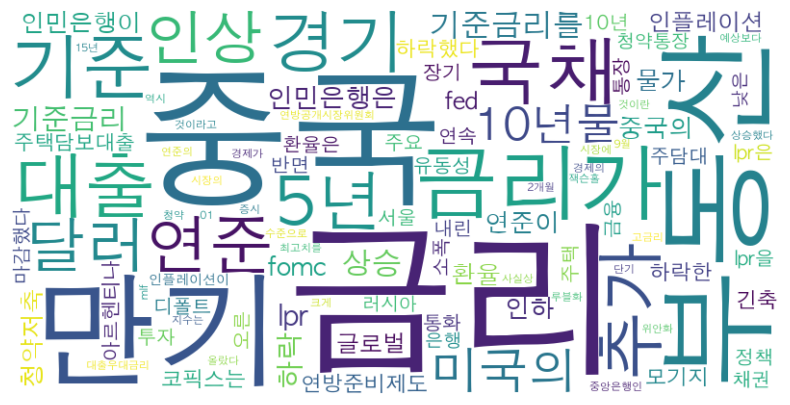

In [35]:
# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, font_path='font/AppleGothic.ttf', background_color='white').generate_from_frequencies(new_word_list)

# 그래프 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

{'금리': 1350, '중국': 1084, '만기': 693, '부동산': 638, '금리가': 609, '국채': 498, '대출': 458, '기준': 446, '추가': 416, '경기': 403, '5년': 373, '연준': 360, '달러': 316, '인상': 308, '미국의': 307, '10년물': 297, '기준금리를': 292, '상승': 274, '기준금리': 264, '하락': 259, 'lpr': 244, '인민은행은': 236, 'fomc': 225, '청약저축': 220, '중국의': 217, '인하': 213, '연준이': 210, '물가': 206, '환율': 205, '인민은행이': 205, '글로벌': 196, 'fed': 193, '인플레이션': 188, '연방준비제도': 186, '코픽스는': 183, '하락한': 178, '모기지': 177, '긴축': 176, '하락했다': 176, '주택담보대출': 174, '아르헨티나': 166, '환율은': 158, '채권': 158, '오른': 155, '유동성': 155, '정책': 155, '통화': 154, 'lpr은': 153, '내린': 150, '주담대': 150, '서울': 149, '통장': 148, '연속': 146, '금융': 146, '주택': 145, '투자': 143, '디폴트': 143, '주요': 141, '10년': 139, '마감했다': 138, '반면': 138, '소폭': 136, 'lpr을': 136, '장기': 135, '청약통장': 132, '낮은': 130, '러시아': 130, '은행': 129, '인플레이션이': 129, '연방공개시장위원회': 127, '올랐다': 126, '예상보다': 125, '연준의': 125, '루블화': 125, '청약': 125, 'mlf': 124, '역시': 122, '단기': 122, '9월': 121, '크게': 120, '대출우대금리': 120, '경제가': 119, '위안화': 118, '최

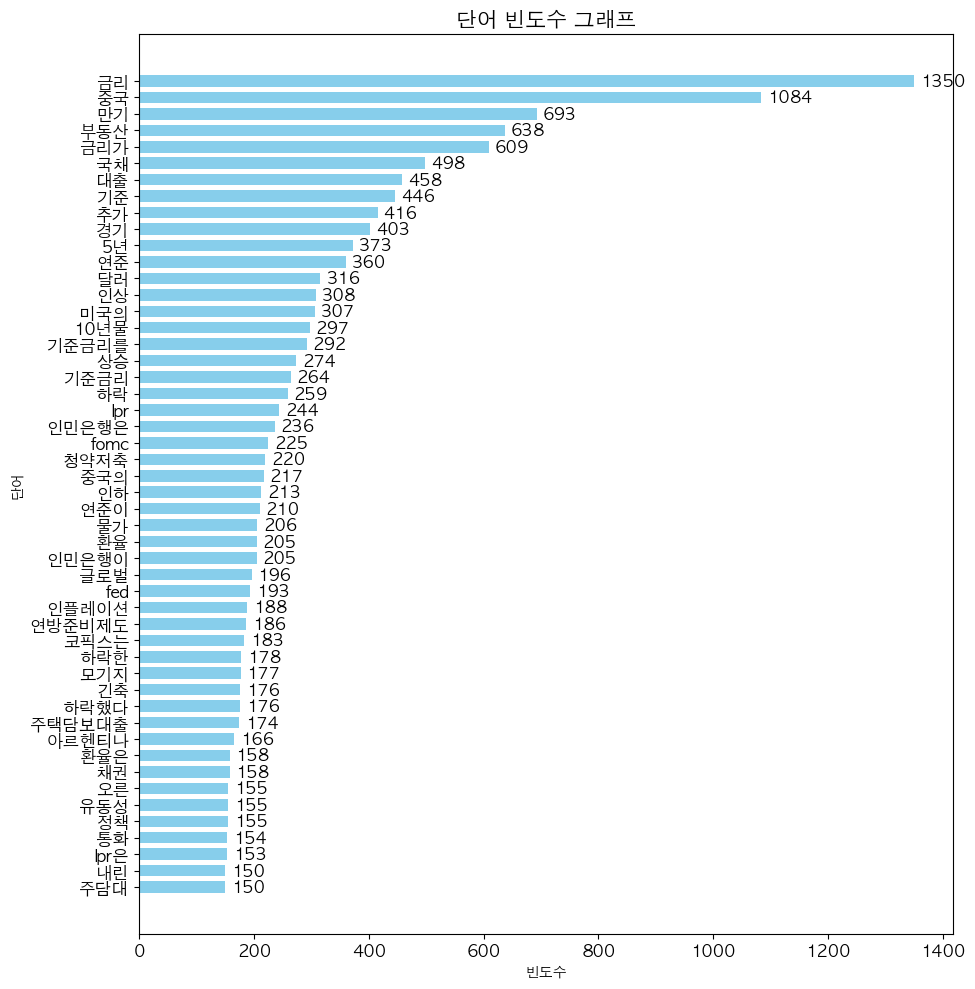

In [36]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에 한글 폰트 설정
plt.rcParams["font.family"] = 'AppleGothic'

# 단어와 빈도수 데이터를 리스트로 변환
words = list(new_word_list.keys())[:50]
counts = list(new_word_list.values())[:50]

print(new_word_list)

# 그래프 그리기
plt.figure(figsize=(12, 10))  # 그래프 크기 조절
bars = plt.barh(words, counts, color='skyblue', height=0.7)  # height 파라미터 조정

# 가로 그래프의 레이블 위치 조정
plt.gca().invert_yaxis()  # y축 역순으로 설정하여 상위 단어가 위에 표시되도록 함

# 숫자 겹침 방지를 위한 텍스트 표시 조정
for bar, count in zip(bars, counts):
    plt.text(count + 10, bar.get_y() + bar.get_height()/2, str(count), va='center', fontsize=12, fontweight='bold')

plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title('단어 빈도수 그래프', fontsize=15, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# x축의 간격 조정
plt.subplots_adjust(left=0.3)

plt.show()
